In [159]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import math

### Part one

In [162]:
def get_data(filename):
    data = np.loadtxt(filename)
    return data[:, 0], data[:, 1], np.arange(1,len(data)+1)

In [166]:
def linearPlot(x, y, name):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    plt.plot(x, y, 'o', label='Original data', markersize=10)
    plt.plot(x, m*x + c, 'r', label='Fitted line')
    plt.legend()
    plt.savefig(name, format="png")
    plt.show()

In [228]:
def plotSingle(x,t,name, title=None):
    fig = plt.figure(figsize=(12, 3), dpi=80)
    plt.plot(t, x, color='b')
    if title:
        plt.title(title)
    else:
        plt.title('periodic signal into a state space')
    plt.xlabel('time')
    plt.ylabel('x')
    plt.legend(('x', 'y'),loc='upper left')
    plt.savefig(name, format="png")
    plt.show()

In [190]:
x, y, time = get_data('takens_1.txt')

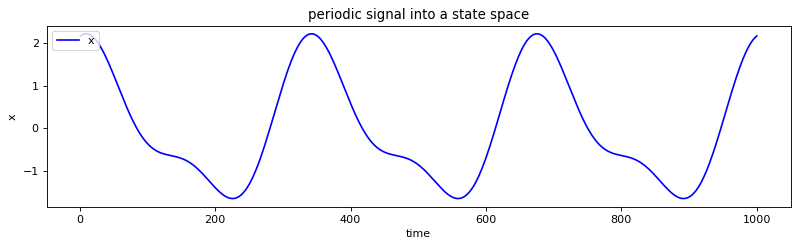

In [191]:
plotSingle(x,time, "4_part1_1.png")

In [180]:
def plotDelayed(x, step=0):
    a=0
    b=334
    x1 = x[a:b]
    x2 = x[a+step:b+step]
    fig = plt.figure(figsize=(8, 8), dpi=80)
    plt.plot(x1, x2,'-b')
    plt.title('Pedestrian flow, delay: '+str(step)+', No. points: '+ str(b))
    plt.xlabel('x')
    plt.ylabel('delayed x')
    plt.legend(('x', 'y'),loc='upper left')
    plt.savefig("pedespath1.png", format="png")
    plt.show()

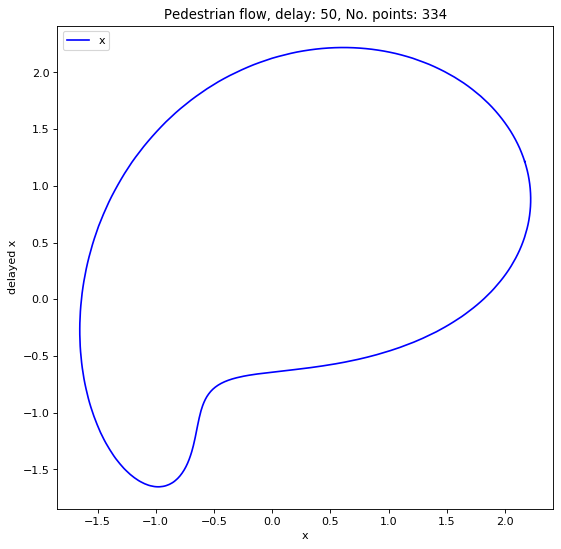

In [181]:
plotDelayed(x, step=50)

In [178]:
def plotxy(x1, x2):
    fig = plt.figure(figsize=(8, 8), dpi=80)
    plt.plot(x1, x2,'-b')
    plt.title('Original x vs y plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig("pedespath_org.png", format="png")
    plt.show()

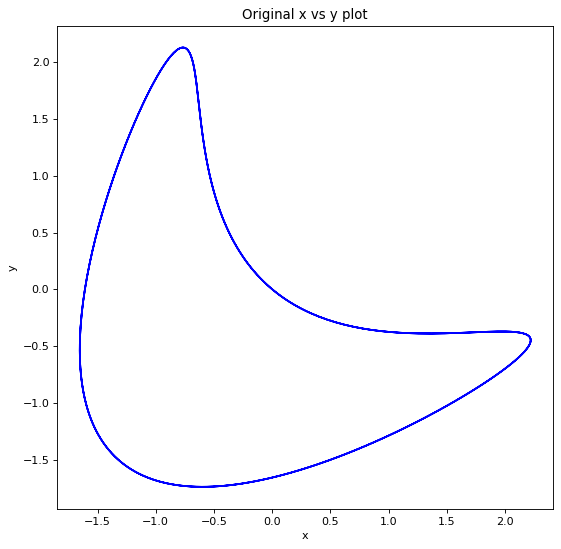

In [179]:
plotxy(x, y)

### Part two

In [207]:
def plot_lorenz(name, x_t, title, x0, shifted=False):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    #ax.axis('off')
    N = len(x0)
    print(N)
    colors = plt.cm.viridis(np.linspace(0, 1, N))
    if shifted == False:
        for i in range(N):
            x = x_t[i].y[0, :]
            y = x_t[i].y[1, :]
            z = x_t[i].y[2, :]
            lines = ax.plot(x, y, z, '-', c=colors[i])
            plt.setp(lines, linewidth=2)
    else:
        x = x_t[0, :]
        y = x_t[1, :]
        z = x_t[2, :]
        lines = ax.plot(x, y, z, '-', c=colors[0])
        plt.setp(lines, linewidth=2)
        
        
    #ax.view_init(30, angle)
    plt.title(title)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    plt.savefig(name, format="png")
    plt.show()
    return x, y, z

In [208]:
def solve_lorenz(x0=[], max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):    
    def lorenz_deriv(t0, x_y_z, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
    
    # Solve for the trajectories
    t = np.linspace(0, max_time, 1000)
    x_t = np.asarray([solve_ivp(fun=lorenz_deriv, t_span=[0, 1000], y0=val, t_eval=t) for val in x0])
        
    title = r'$x0 = {0}, \sigma={1}, \beta = {2}, \rho = {3}$'.format(x0, sigma,round(beta,2),rho)
    return t, x_t, title

In [209]:
def shift_arr(x, step):
    a=0
    b=500
    x1 = x[a:b]
    x2 = x[a+step:b+step]
    x3 = x[a+2*step:b+2*step]
    return np.array([x1,x2,x3])

In [210]:
x0 = [[10,10,10]]
t, x_t, title = solve_lorenz(x0, max_time=30)

1


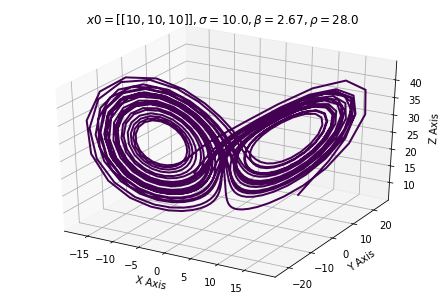

In [211]:
x, y, z = plot_lorenz('lorentz_1.png', x_t, title, x0)

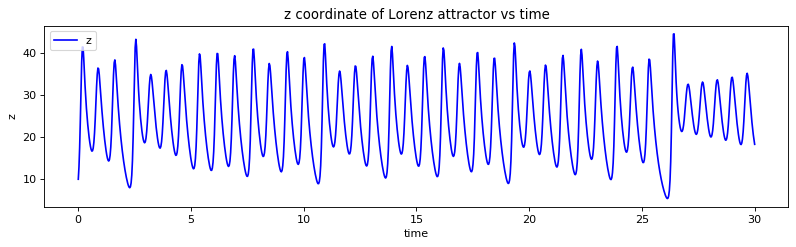

In [229]:
plotSingle(x,t,name="lorentz_2.png", title="x coordinate of Lorenz attractor vs time")

1


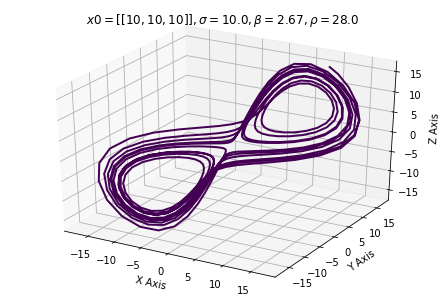

In [217]:
x_bundle = shift_arr(x, 3)
_, _, _= plot_lorenz('lorentz_3.png', x_bundle, title, x0, shifted=True)

1


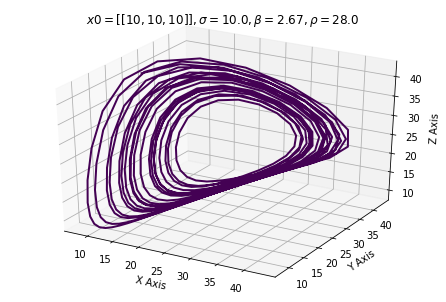

In [218]:
x_bundle = shift_arr(z, 3)
_, _, _= plot_lorenz('lorentz_4z.png', x_bundle, title, x0, shifted=True)

### Part Three

In [196]:
def getXYT(filename):
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=' ')
        line_count = 0
        x = []
        y = []
        t =[]
        for row in csv_reader:
            if line_count!=0:
                if int(row[1]) == 1:
                    t.append(float(row[0]))
                    x.append(float(row[2]))
                    y.append(float(row[3]))
            line_count=1
    return np.array(t),np.array(x),np.array(y)

In [199]:
def plotPedestrian(t,x,y,name,title=None):
    fig = plt.figure(figsize=(12, 3), dpi=80)
    plt.plot(t, x, color='b')
    plt.plot(t, y, color='orange')
    if title:
        plt.title(title)
    else:
        plt.title('Pedestrian 1')
    plt.xlabel('time')
    plt.ylabel('coordinates')
    plt.legend(('x', 'y'),loc='upper left')
    plt.savefig(name, format="png")
    plt.show()

In [205]:
def plotPedestrianX(x1,x2,name,title=None):
    fig = plt.figure(figsize=(8, 8), dpi=80)
    plt.plot(x1, x2,'-b')
    if title:
        plt.title(title)
    else:
        plt.title('Pedestrian flow')
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.legend(('x', 'y'),loc='upper left')
    plt.savefig(name, format="png")
    plt.show()

In [201]:
def delay_array(x, step=1):
    del_lst = []
    for i in range(1300): 
        temp=[]
        for j in range(200):
            temp.append(x[i+j*step])
        del_lst.append(np.array(temp))   
        
    return np.array(del_lst)       

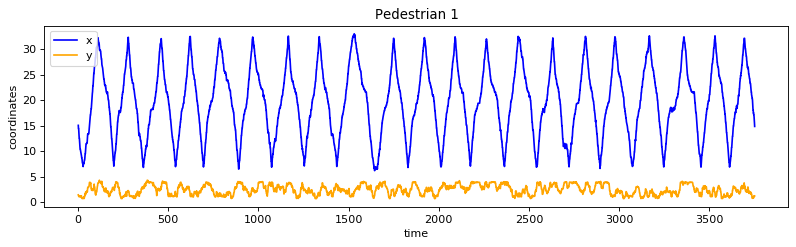

In [202]:
t,x,y = getXYT('scene13.trajectories')
plotPedestrian(t,x,y,'4_part3_1.png')

In [203]:
val = delay_array(x[:1500])

In [204]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(val)

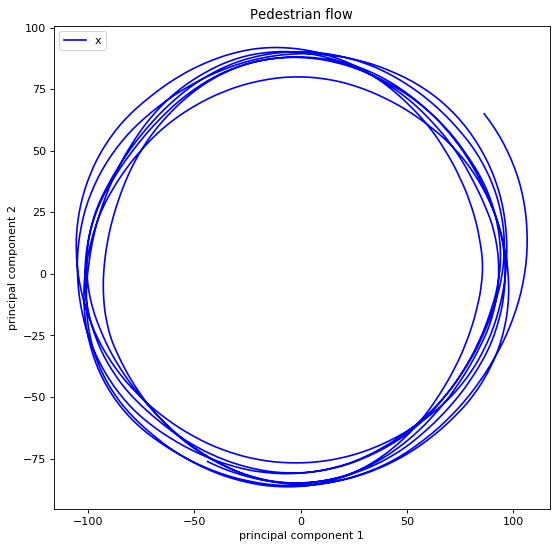

In [206]:
plotPedestrianX(principalComponents[:,0],principalComponents[:,1], '4_part3_2.png')